In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import yfinance as yf
yf.pdr_override()

/Users/hoover/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
ticker = pd.read_csv('dowjones_new.csv')
ticker

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AA,AA,AA,AA,AXP,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
1,AXP,AXP,AXP,AXP,BA,AXP,AXP,AXP,AXP,AXP,AXP
2,BA,BA,BA,BA,CAT,BA,BA,BA,BA,BA,BA
3,BAC,BAC,BAC,BAC,CSCO,CAT,CAT,CAT,CAT,CAT,CAT
4,CAT,CAT,CAT,CAT,CVX,CSCO,CSCO,CSCO,CSCO,CSCO,CSCO
5,CSCO,CSCO,CSCO,CSCO,DD,CVX,CVX,CVX,CVX,CVX,CVX
6,CVX,CVX,CVX,CVX,DIS,DD,DD,DD,DD,DD,DOW
7,DD,DD,DD,DD,GE,DIS,DIS,DIS,DIS,DIS,DIS
8,DIS,DIS,DIS,DIS,GS,GE,GE,GE,GE,GS,GS
9,GE,GE,GE,GE,HD,GS,GS,GS,GS,HD,HD


In [3]:
momentum_all = []
for i in range(len(ticker.columns)-1):
    start_date = str(str(2010+i)+'-01-01')
    end_date = str(str(2010+i)+'-12-31')
    df = pdr.data.get_data_yahoo(ticker.iloc[0:30,i].tolist(), start=start_date, end=end_date)['Adj Close']
    df.drop(labels=df.columns[df.isnull().any()].tolist(), axis='columns', inplace=True)
    df_return = df.pct_change()
    df_avg_annualreturn = df_return.mean() * 250
    df_avg_annualreturn.sort_values(inplace=True, ascending=False)
    r_selected = df_avg_annualreturn[0:10]
    r_selected_ticker = r_selected.index.tolist()
    start_date_2 = str(str(2011+i)+'-01-01')
    end_date_2 = str(str(2011+i)+'-12-31')
    df2 = pdr.data.get_data_yahoo(r_selected_ticker, start=start_date_2, end=end_date_2)['Adj Close']
    df2_return = df2.pct_change()
    df2_avg_annualreturn = df2_return.mean() * 250
    W = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
    momentum = np.dot(df2_avg_annualreturn,W)
    momentum_all.append(momentum)
momentum_all

[*********************100%***********************]  30 of 30 completed


3 Failed downloads:
['T']: DatabaseError('database disk image is malformed')
['UTX']: Exception('%ticker%: No timezone found, symbol may be delisted')
['KFT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2010-01-01 -> 2010-12-31)')



[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  30 of 30 completed


2 Failed downloads:
['UTX']: Exception('%ticker%: No timezone found, symbol may be delisted')
['KFT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2011-01-01 -> 2011-12-31)')



[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  30 of 30 completed


2 Failed downloads:
['KFT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2012-01-01 -> 2012-12-31)')
['UTX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  30 of 30 completed


1 Failed download:
['UTX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  30 of 30 completed


2 Failed downloads:
['WMT']: DatabaseError('file is not a database')
['UTX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  30 of 30 completed


1 Failed download:
['UTX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  30 of 30 completed


1 Failed download:
['UTX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  30 of 30 completed


1 Failed download:
['UTX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  30 of 30 completed


1 Failed download:
['UTX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  30 of 30 completed


1 Failed download:
['UTX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  10 of 10 completed


[0.1305447124831194,
 0.0823570240193576,
 0.2771776723839316,
 0.1882069003304004,
 0.1597571875009878,
 0.10421250745399678,
 0.1857125962533301,
 0.03032184007982572,
 0.2187157400996796,
 0.27067516522058677]

In [5]:
Dowjones = pdr.data.get_data_yahoo('^DJI', start='2011-01-01',end='2020-12-31')
Dowjones['Simple return'] = Dowjones['Adj Close'].pct_change()
Dowjones.drop(labels=['High', 'Low','Open','Close','Volume'],axis='columns',inplace=True)
Dowjones['Year'] = Dowjones.index.year
Dowjones.drop(labels=['Adj Close'],axis='columns',inplace=True)
R_Dow = Dowjones.groupby('Year').mean()*250
port = momentum_all
R_Dow['Momentum Strategy Portfolio Return']=port
R_Dow = R_Dow.rename(columns={'Simple return':'Dow Jones Simple Return'})
R_Dow

[*********************100%***********************]  1 of 1 completed


,Dow Jones Simple Return,Momentum Strategy Portfolio Return
Year,,
2011,0.067588,0.130545
2012,0.076937,0.082357
2013,0.238412,0.277178
2014,0.077792,0.188207
2015,-0.010606,0.159757
2016,0.132782,0.104213
2017,0.225166,0.185713
2018,-0.041812,0.030322
2019,0.207761,0.218716


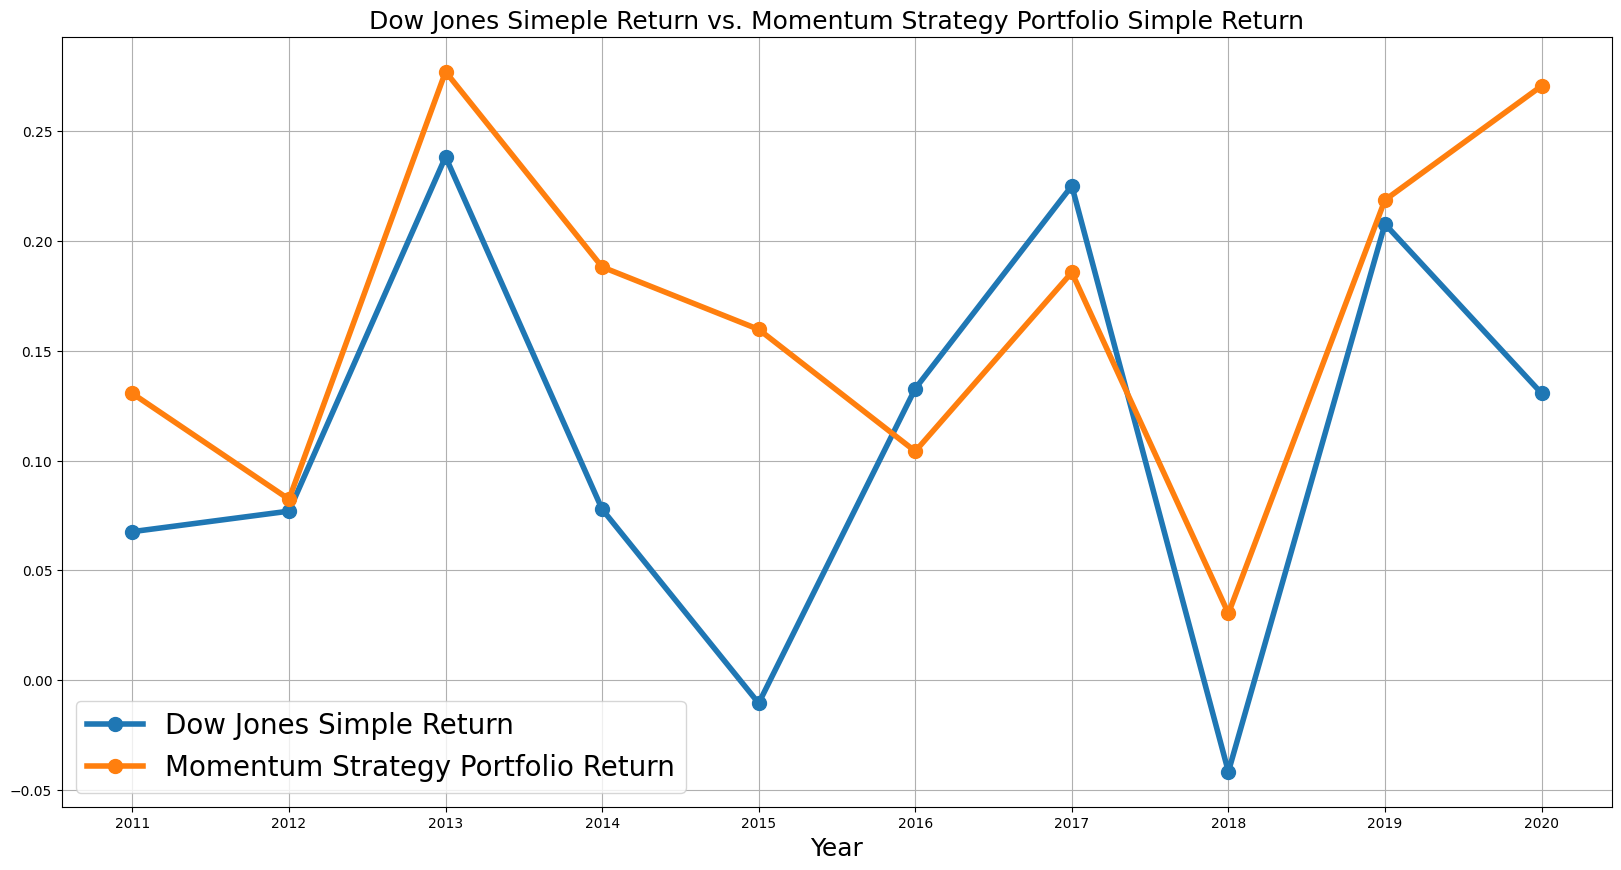

In [6]:
R_Dow[['Dow Jones Simple Return','Momentum Strategy Portfolio Return']].plot(figsize=(20, 10),  marker='o',markersize=10.0,linewidth=4.0)
plt.title('Dow Jones Simeple Return vs. Momentum Strategy Portfolio Simple Return', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.legend(prop={'size': 20})
plt.grid(True)
plt.xticks(R_Dow.index)
plt.show()